In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("../data/raw_analyst_ratings.csv")

In [3]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# 1. Descriptive Statistics

# Headline Length
data["headline_length"] = data["headline"].apply(len)

In [5]:
# Basic statistics for headline length
headline_stats = data["headline_length"].describe()
print("Descriptive Statistics for Headline Length:")
print(headline_stats)

Descriptive Statistics for Headline Length:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [6]:
# Count articles per publisher
publisher_counts = data["publisher"].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [7]:
# Convert 'date' column to datetime type with flexible format
data["date"] = pd.to_datetime(data["date"], errors="coerce")

In [8]:
# Analyze publication dates
data["date_month"] = data["date"].dt.month
monthly_article_counts = data.groupby("date_month").size()
print("\nMonthly Article Counts:")
print(monthly_article_counts)


Monthly Article Counts:
date_month
1.0      3068
2.0      4091
3.0      6391
4.0      6468
5.0     11363
6.0      7968
7.0      2131
8.0      2858
9.0      2417
10.0     3079
11.0     3210
12.0     2943
dtype: int64


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [13]:
# Perform sentiment analysis on headlines
data["headline_sentiment"] = data["headline"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

# Print a few rows to see the results
print(data[["headline", "headline_sentiment"]].head())

                                            headline  headline_sentiment
0            Stocks That Hit 52-Week Highs On Friday               0.000
1         Stocks That Hit 52-Week Highs On Wednesday               0.000
2                      71 Biggest Movers From Friday               0.000
3       46 Stocks Moving In Friday's Mid-Day Session               0.000
4  B of A Securities Maintains Neutral on Agilent...               0.296


In [15]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to convert text data into a bag-of-words representation
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(data["headline"])

In [ ]:
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
# Fit LDA model
lda.fit(X)

In [ ]:
# Print the top words for each topic
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[::-1][:10]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx+1}: {' '.join(top_words)}")

Top words for each topic:
Topic 1: 5953 lagnado 776k 1361 01725 grocers incoming ertel collared attd
Topic 2: jamming deprivation tam midsteam progen 2fwqhat 6079 178m favorable viriginia
Topic 3: aeoropostale singular midwestern hindered devil fanatics deflazacort dickindon 713m françois
Topic 4: 1159 47976 glaxsosmithkline aseracare contrarian blecher exacerbated xiaflex realpoint badrinarayanan
Topic 5: morecambe acecad pivotalphase mislead 2734 2218 saint wingman mile 0017


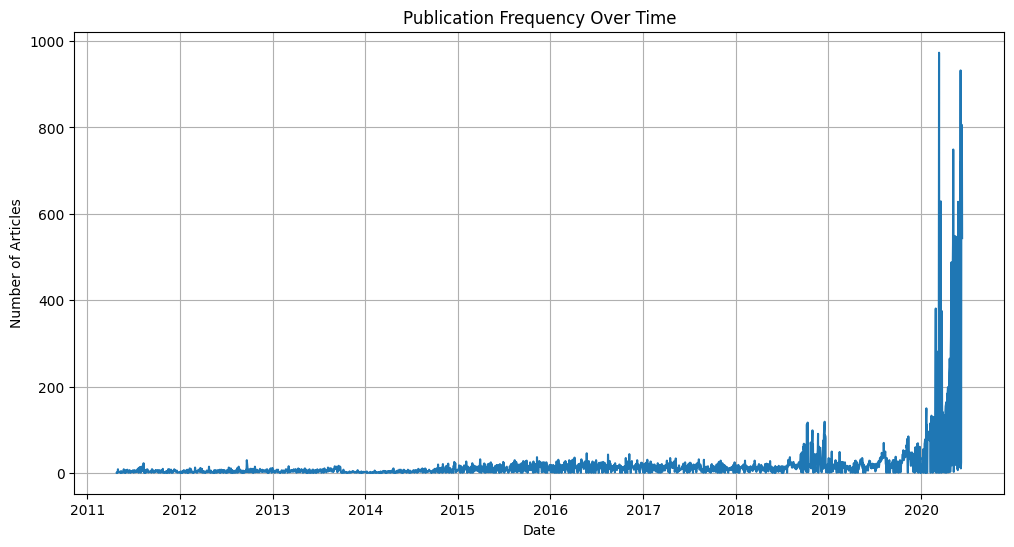

In [ ]:
# Count the number of articles published each day
daily_article_counts = data.groupby(data["date"].dt.date).size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
daily_article_counts.plot(kind="line")
plt.title("Publication Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()